In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

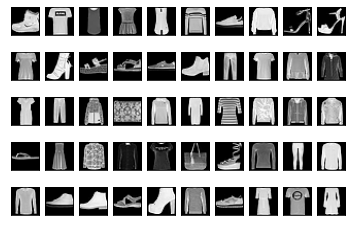

In [ ]:
import matplotlib.pyplot as plt

for digit_num in range(0,50):
  plt.subplot(5, 10, digit_num+1)
  mat_data = X_train[digit_num].reshape(28,28)
  plt.imshow(mat_data, cmap='gray')
  plt.xticks([])
  plt.yticks([])


In [ ]:
y_train[0:50]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1,
       4, 8, 4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0, 8, 5, 2, 1, 6, 6, 7, 9, 5,
       9, 2, 7, 3, 0, 3], dtype=uint8)

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

In [ ]:
X_test.shape

(10000, 784)

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop

In [ ]:
model = Sequential()

In [ ]:
# Without BatchNormalization

model.add(Dense(units=128, activation='relu', input_shape=(784,)))
model.add(Dense(units=64, activation='tanh'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.python import metrics
model.compile(optimizer = Adam(learning_rate=0.003),
                                loss = tensorflow.keras.losses.SparseCategoricalCrossentropy(),
                                metrics=['accuracy'])

In [ ]:
result  = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs= 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4954 - accuracy: 0.8191 - val_loss: 0.4281 - val_accuracy: 0.8464
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3893 - accuracy: 0.8581 - val_loss: 0.3950 - val_accuracy: 0.8561
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3593 - accuracy: 0.8691 - val_loss: 0.3844 - val_accuracy: 0.8618
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3431 - accuracy: 0.8751 - val_loss: 0.3655 - val_accuracy: 0.8646
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3299 - accuracy: 0.8782 - val_loss: 0.3720 - val_accuracy: 0.8656
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3171 - accuracy: 0.8840 - val_loss: 0.3959 - val_accuracy: 0.8579
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3095 - accuracy: 0.8855 - val_loss: 0.3732 - val_accuracy:

In [ ]:
model.get_weights()

[array([[ 0.02769792, -0.06014913,  0.3022538 , ...,  0.04381595,
          0.06872033,  0.05519523],
        [-0.01605476,  0.02292942, -0.21183477, ..., -0.01673452,
         -0.02475167,  0.03083269],
        [ 0.03340263, -0.05496575,  0.49094135, ..., -0.04838881,
         -0.01767874,  0.02189862],
        ...,
        [ 0.00606371,  0.00339069, -0.1357009 , ..., -0.05145483,
         -0.17440625,  0.03208654],
        [ 0.07977793,  0.00704684,  0.16845307, ..., -0.06715398,
         -0.07228236,  0.17669629],
        [ 0.06005397,  0.02404356,  0.07445962, ...,  0.16410495,
         -0.05304931,  0.15231605]], dtype=float32),
 array([-0.2043032 , -0.01882586,  0.6179696 , -0.03273936, -0.5041821 ,
        -0.00958512,  0.75697017, -0.00786857, -0.11731737, -0.07214991,
        -0.91119957, -0.04716647,  0.32966295,  0.3142531 , -0.22477752,
        -0.55138195, -0.10116671, -0.06144605,  0.5234088 ,  0.13279773,
         0.21064459,  0.3613257 , -0.05329617, -1.1192621 ,  0.566

In [ ]:
# If the weights are too high then we need to apply batch normalization.
model_batch = Sequential()
model_batch.add(Dense(units=128, activation='relu', input_shape=(784,)))
model.add(BatchNormalization())
model_batch.add(Dense(units=64, activation='tanh'))
model_batch.add(Dense(units=32, activation='relu'))
model_batch.add(Dense(units=10, activation='softmax'))

In [ ]:
from tensorflow.python import metrics
model_batch.compile(optimizer = Adam(learning_rate=0.003),
                                loss = tensorflow.keras.losses.SparseCategoricalCrossentropy(),
                                metrics=['accuracy'])

In [ ]:
result  = model_batch.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs= 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5005 - accuracy: 0.8159 - val_loss: 0.4468 - val_accuracy: 0.8356
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3912 - accuracy: 0.8555 - val_loss: 0.4452 - val_accuracy: 0.8400
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3646 - accuracy: 0.8662 - val_loss: 0.4109 - val_accuracy: 0.8531
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3452 - accuracy: 0.8736 - val_loss: 0.3960 - val_accuracy: 0.8592
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3290 - accuracy: 0.8801 - val_loss: 0.3813 - val_accuracy: 0.8647
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3192 - accuracy: 0.8832 - val_loss: 0.3734 - val_accuracy: 0.8687
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3142 - accuracy: 0.8853 - val_loss: 0.3757 - val_accuracy:

In [ ]:
# Using RMPromp

model_RMSprop = Sequential()
model_RMSprop.add(Dense(units=128, activation='relu', input_shape=(784,)))
#model.add(BatchNormalization())
model_RMSprop.add(Dense(units=64, activation='tanh'))
model_RMSprop.add(Dense(units=32, activation='relu'))
model_RMSprop.add(Dense(units=10, activation='softmax'))

In [ ]:
from tensorflow.python import metrics
model_RMSprop.compile(optimizer = RMSprop(learning_rate=0.003),
                                loss = tensorflow.keras.losses.SparseCategoricalCrossentropy(),
                                metrics=['accuracy'])

In [ ]:
result  = model_RMSprop.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs= 10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5314 - accuracy: 0.8041 - val_loss: 0.4562 - val_accuracy: 0.8362
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4366 - accuracy: 0.8440 - val_loss: 0.4542 - val_accuracy: 0.8424
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4264 - accuracy: 0.8507 - val_loss: 0.4508 - val_accuracy: 0.8550
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4218 - accuracy: 0.8540 - val_loss: 0.4904 - val_accuracy: 0.8393
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4261 - accuracy: 0.8530 - val_loss: 0.4658 - val_accuracy: 0.8396
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4174 - accuracy: 0.8577 - val_loss: 0.4586 - val_accuracy: 0.8528
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4130 - accuracy: 0.8584 - val_loss: 0.4530 - val_accuracy: